# PDF Malware Prediction

### Group 21:
* Raghav Kandpal
* Archit Raj

In [2]:
pip install scikit-plot

In [3]:
import numpy as np
import pandas as pd
#sets pandas dataframe max columns
pd.set_option('display.max_columns', None)
import re
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #for oversampling
from sklearn.feature_selection import RFE #for feature selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt #for plotting the results
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization

### Import DataFrame and Data Exploration

In [6]:
from google.colab import files
file = files.upload()
df = pd.read_csv('PDFMalware2022.csv',header=0)
print(df.shape)
print(list(df.columns))

Saving PDFMalware2022.csv to PDFMalware2022.csv
(10026, 33)
['File name', 'pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class']


In [7]:
df.head(10)

,File name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,10.00,10.00,3.0,3.00,1.00,1.0,1.00,1.00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0.0,No,\t%PDF-1.6,19.00,19.00,9.0,9.00,1.00,1.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0.0,Yes,\t%PDF-1.3,12.00,12.00,3.0,3.00,1.00,1.0,1.00,2.00,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,14.00,14.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0.0,Yes,\t%PDF-1.3,15.00,15.00,4.0,4.00,1.00,1.0,1.00,3.00,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
5,b9d26b76b17fdbce1848e3c42a44e6b728aefeb34d2ba1...,14.0,224.0,0.0,20.0,7.0,0.0,0.0,0.0,No,\t%PDF-1.6,19.00,19.00,9.0,9.00,1.00,1.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,Malicious
6,600f63e6b331f4bdc6e2ae6587fc7b5f9e45abd774e266...,2048.0,291.0,1.0,27.0,3.0,0.0,0.0,0.0,No,\t%PDF-1.5,29.00,29.00,6.0,6.00,3.00,3.0,3.00,1.00,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
7,d2e3b1f66bd5ece83915462137e44b0a35f31122fd08e1...,6.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,14.00,14.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
8,f97cf17003a62df8eae1c74841777a6c10578718f72ee9...,2.0,256.0,1.0,15.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,14.00,14.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
9,afe8d2abf6807bb1b83affc20b8fcb424d75cb7ce340c9...,14.0,256.0,1.0,16.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.4,15.00,15.00,2.0,2.00,1.00,1.0,1.00,1.00,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious


In [8]:
df['Class'].unique()

array(['Malicious', nan, 'Benign'], dtype=object)

### Data Cleaning and Preprocessing

In [9]:
df = df.drop(df[df['Class'].isnull()].index.tolist(), axis=0)
df = df.drop(df[df['endobj'] == 'pdfid.py'].index.tolist(), axis=0)
df = df.fillna(0)

In [10]:
df = df.replace([-1, -1.00],0)

In [11]:
df["Class"] = np.where(df["Class"].str.contains("Malicious"), 1, 0)
df["text"] = np.where(df["text"].str.contains("Yes"), 1, 0)

In [12]:
def header_obj(col):
  match = re.search('%PDF-\d*.?\d*', col)
  if match:
    return 1
  return 0

df['header'] = df['header'].apply(lambda col: header_obj(col))

### More Data Exploration

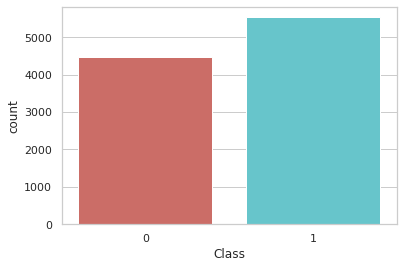

<Figure size 432x288 with 0 Axes>

In [13]:
sns.countplot(x='Class', data = df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [14]:
print('Percentage of Malicious vs Benign Classes')
df['Class'].value_counts()/len(df) * 100

Percentage of Malicious vs Benign Classes


1    55.3334
0    44.6666
Name: Class, dtype: float64

In [15]:
df.groupby('Class').mean()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,stream,trailer,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
Class,,,,,,,,,,,,,,,,,,,,,,,,,
0,108.566473,318.296329,5.081916,238.195166,13.370859,0.009848,0.000448,4.227171,0.643688,0.992614,33.058639,1.553044,0.012086,3.100269,0.329902,0.381379,0.621531,0.055282,0.593330,0.090868,0.000000,0.000895,0.626902,0.001343,2.914727
1,69.796748,347.386811,2.101897,4768.472809,82.487805,0.008672,0.042276,0.664679,0.159530,0.908762,4.814092,1.023487,0.009214,0.341825,1.088528,1.439747,0.070822,0.525926,0.229088,0.005239,0.012285,0.023487,0.493767,0.096838,1.528275


### Data Visualization

In [16]:
fig = px.scatter(x=df['pdfsize'], y=df['metadata size'], color=df['Class'], 
                 labels={'x':'PDF Size', 'y':'Metadata size', 'color':'Class'}, title='PDF Size vs Metadata size')
fig.show()

In [17]:
img = df.images
imgs={'0':0,'1-5':0,'6-20':0,'21-50':0,'>50':0}
for i in img:
    if i == '1(1)':
        next
    elif int(i) == 0:
        imgs['0']+=1
    elif int(i)>0 and int(i)<6:
        imgs['1-5']+=1
    elif int(i)>5 and int(i)<21:
        imgs['6-20']+=1
    elif int(i)>20 and int(i)<51:
        imgs['21-50']+=1
    else:
        imgs['>50']+=1

imgs_df = pd.DataFrame(imgs.items())
imgs_df.columns=['Category','Count']

px.histogram(imgs_df, x='Category', y='Count', title='Images in PDF')

### Correlation Analysis

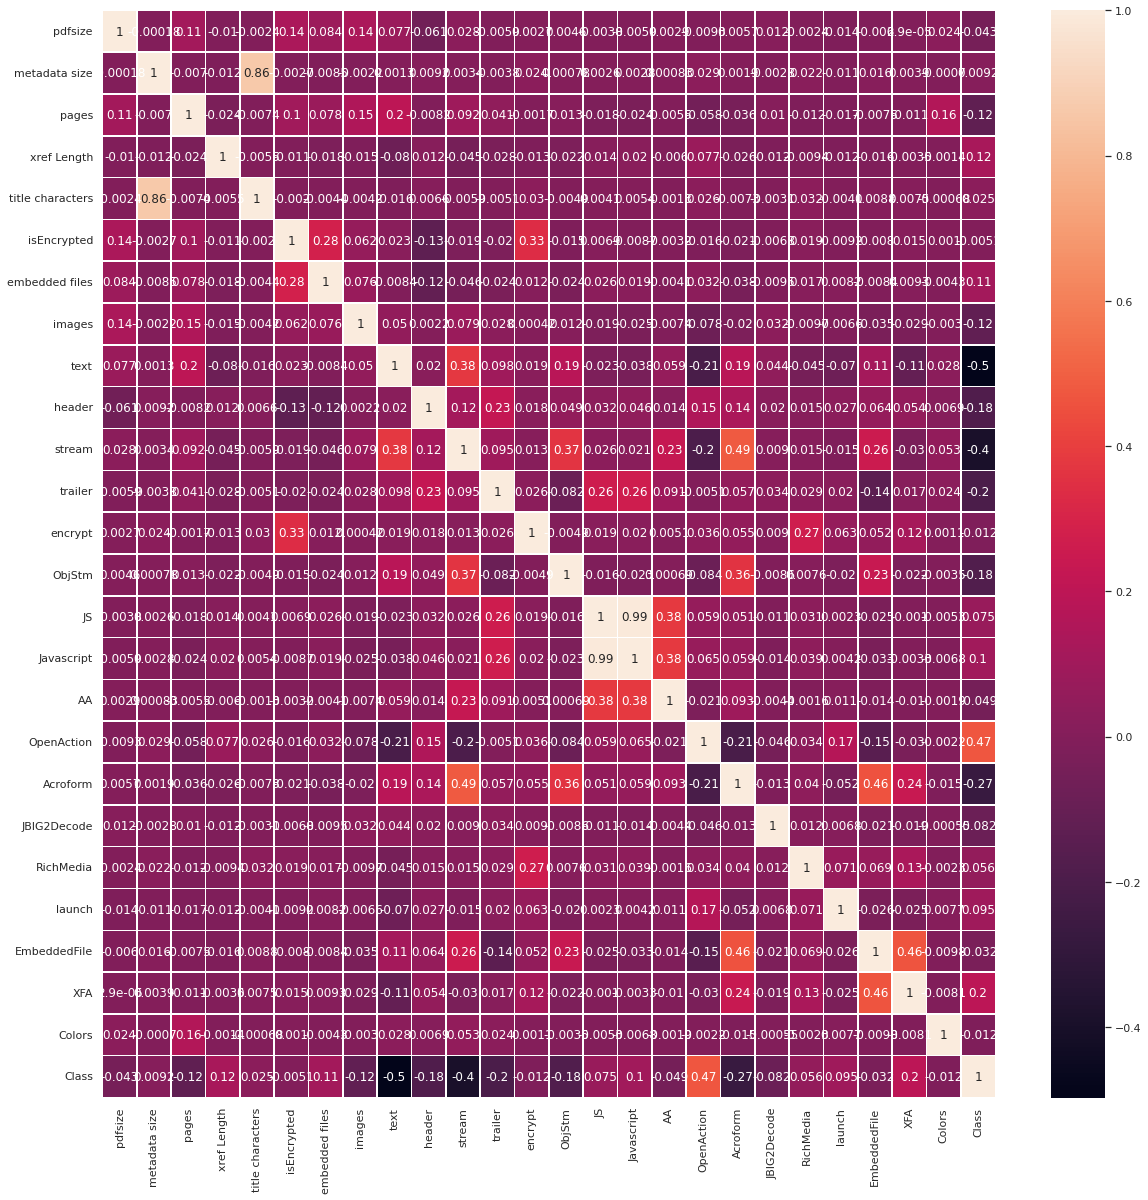

In [18]:
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.heatmap(df.corr(), annot=True, linewidths=.5)

#### Removing highly correlated features

In [19]:
df = df.drop(['JS','title characters'], axis=1)

### Preparing data for model fitting

In [20]:
y = df['Class']
X = df.drop(['File name', 'Class'], axis=1)

#### Scaling data

In [21]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

#### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = True)

### Comparing Multiple Models

#### Logistic Regression

In [23]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
print('Training Data Accuracy:',logreg.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, logreg.predict(X_test)))

Training Data Accuracy: 0.8479072247400693
Test Data Accuracy: 0.8296681327469012


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



#### KNearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors=500, algorithm='brute')
knn.fit(X_train,y_train)
print('Training Data Accuracy:',knn.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, knn.predict(X_test)))

Training Data Accuracy: 0.8647027459344175
Test Data Accuracy: 0.8608556577369052


#### Support Vector Classifier

In [25]:
svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, svm.predict(X_test)))

Training Data Accuracy: 0.9996001066382298
Test Data Accuracy: 0.8848460615753698


### Base Model Preformance Evaluation

In [26]:
predicted_opt_proba = svm.predict_proba(X_test)

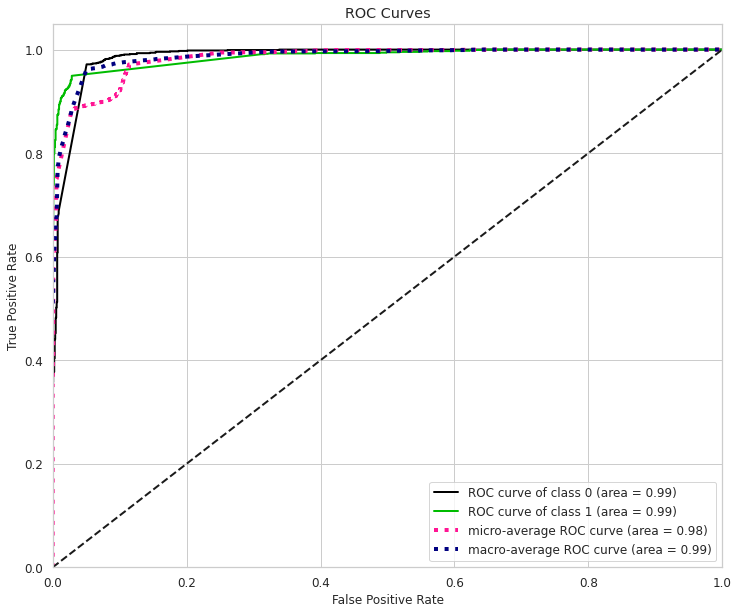

In [27]:
skplt.metrics.plot_roc(y_test, predicted_opt_proba, figsize=(12,10))

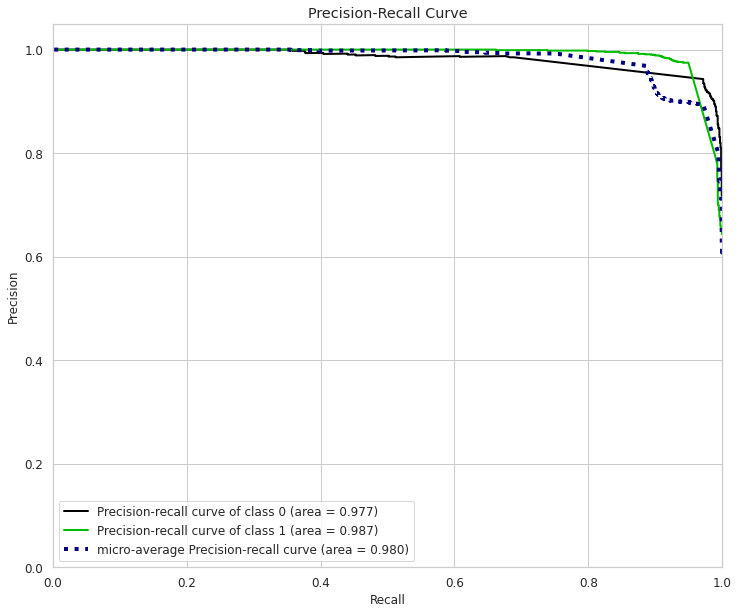

In [28]:
skplt.metrics.plot_precision_recall(y_test, predicted_opt_proba, figsize=(12,10))

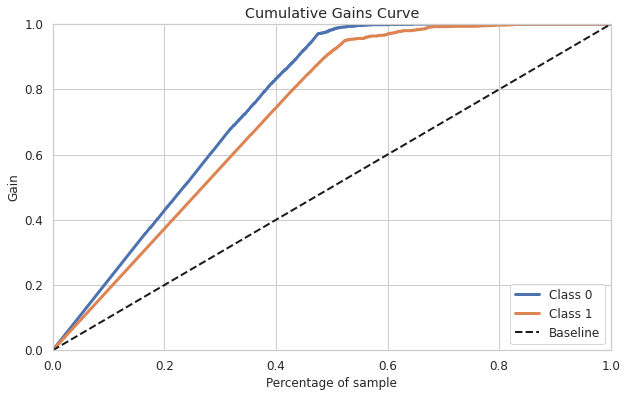

In [29]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_opt_proba, figsize=(10,6))

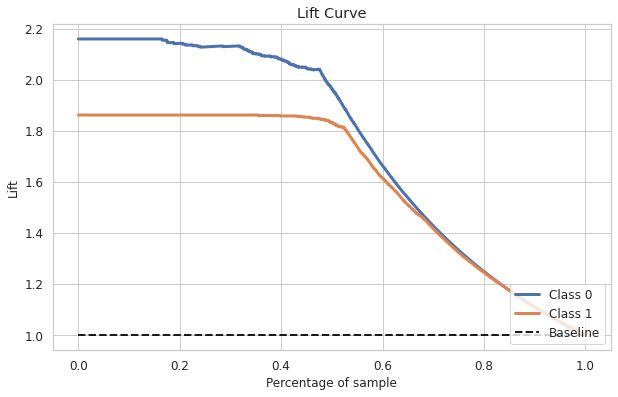

In [30]:
skplt.metrics.plot_lift_curve(y_test, predicted_opt_proba, figsize=(10,6))

### Oversampling

In [31]:
os = SMOTE(random_state=0)
columns = X.columns

os_X,os_y = os.fit_resample(X, y)
os_X = pd.DataFrame(data=os_X,columns=columns )
os_y= pd.DataFrame(data=os_y,columns=['Class'])

In [32]:
os_X.head()

,pdfsize,metadata size,pages,xref Length,isEncrypted,embedded files,images,text,header,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,1,10.0,10.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,224.0,0.0,20.0,0.0,0.0,0.0,0,1,19.0,19.0,9.0,9.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0
2,4.0,468.0,2.0,13.0,0.0,0.0,0.0,1,1,12.0,12.0,3.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,1,14.0,14.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,252.0,3.0,16.0,0.0,0.0,0.0,1,1,15.0,15.0,4.0,4.0,1.0,1.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print("Length of oversampled data is ",len(os_X))
print("Number of benign class in oversampled data",len(os_y[os_y['Class']==0]))
print("Number of malicious class in oversampled data",len(os_y[os_y['Class']==1]))
print("Proportion of benign class in oversampled data is ",len(os_y[os_y['Class']==0])/len(os_X))
print("Proportion of malicious class in oversampled data is ",len(os_y[os_y['Class']==1])/len(os_X))

Length of oversampled data is  11070
Number of benign class in oversampled data 5535
Number of malicious class in oversampled data 5535
Proportion of benign class in oversampled data is  0.5
Proportion of malicious class in oversampled data is  0.5


In [34]:
scaler = StandardScaler().fit(os_X)
os_X_scaled = pd.DataFrame(scaler.transform(os_X), columns=os_X.columns)

### Feature Selection

In [35]:
estimator = SVC(kernel="linear")
rfe = RFE(estimator, n_features_to_select=20)
rfe = rfe.fit(os_X_scaled, os_y.values.ravel())
cols_to_keep = rfe.support_

In [36]:
for i in range(len(os_X.columns)):
    print(f'Column: {os_X.columns[i]}, Selected: {rfe.support_[i]}')

Column: pdfsize, Selected: True
Column: metadata size, Selected: False
Column: pages, Selected: False
Column: xref Length, Selected: True
Column: isEncrypted, Selected: False
Column: embedded files, Selected: True
Column: images, Selected: True
Column: text, Selected: True
Column: header, Selected: False
Column: obj, Selected: True
Column: endobj, Selected: False
Column: stream, Selected: True
Column: endstream, Selected: True
Column: xref, Selected: True
Column: trailer, Selected: True
Column: startxref, Selected: False
Column: pageno, Selected: True
Column: encrypt, Selected: False
Column: ObjStm, Selected: True
Column: Javascript, Selected: True
Column: AA, Selected: True
Column: OpenAction, Selected: True
Column: Acroform, Selected: False
Column: JBIG2Decode, Selected: False
Column: RichMedia, Selected: True
Column: launch, Selected: True
Column: EmbeddedFile, Selected: True
Column: XFA, Selected: True
Column: Colors, Selected: True


In [37]:
cols = np.array(os_X.columns)[np.array(cols_to_keep)]

In [38]:
X = os_X_scaled[cols]
y = os_y['Class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = True)

### SVM with Feature Selection

In [40]:
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
predicted = svm.predict(X_test)
print('Test Data Accuracy:',metrics.accuracy_score(y_test, predicted))
predicted_proba = svm.predict_proba(X_test)

Training Data Accuracy: 0.9592869188147435
Test Data Accuracy: 0.9573699421965318


### Grid Search CV

In [41]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.958 total time=   0.9s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.960 total time=   0.9s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.958 total time=   0.9s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.957 total time=   0.9s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.960 total time=   1.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.952 total time=   0.4s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.954 total time=   0.4s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.955 total time=   0.4s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.954 total time=   0.4s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.955 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.957 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

### SVM with Optimal Hyperparameters

In [43]:
svm = SVC(C=10, kernel="rbf", gamma='auto', probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
predicted_optimal = svm.predict(X_test)
print('Test Data Accuracy:',metrics.accuracy_score(y_test, predicted_optimal))

Training Data Accuracy: 0.9795230065044568
Test Data Accuracy: 0.9725433526011561


### Final Model Performance Evaluation

In [44]:
print('Accuracy score for test set',metrics.accuracy_score(y_test, predicted_optimal))

Accuracy score for test set 0.9725433526011561


In [45]:
print(metrics.classification_report(y_test, predicted_optimal))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1405
           1       0.98      0.96      0.97      1363

    accuracy                           0.97      2768
   macro avg       0.97      0.97      0.97      2768
weighted avg       0.97      0.97      0.97      2768



In [46]:
predicted_opt_proba = svm.predict_proba(X_test)

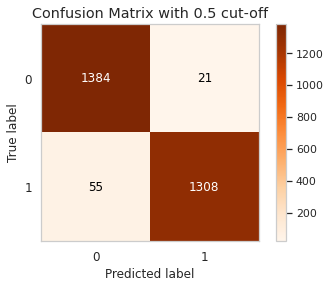

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, predicted_optimal,
                                    title="Confusion Matrix with 0.5 cut-off",
                                    cmap="Oranges")

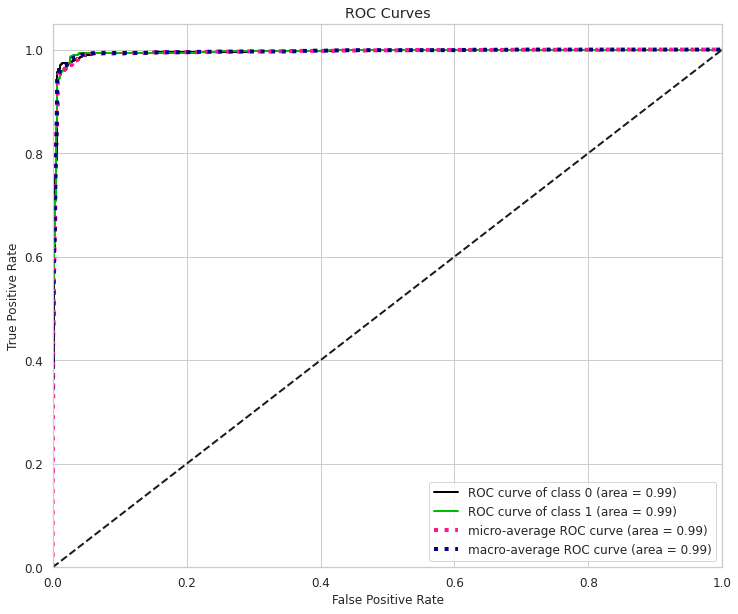

In [48]:
skplt.metrics.plot_roc(y_test, predicted_opt_proba, figsize=(12,10))

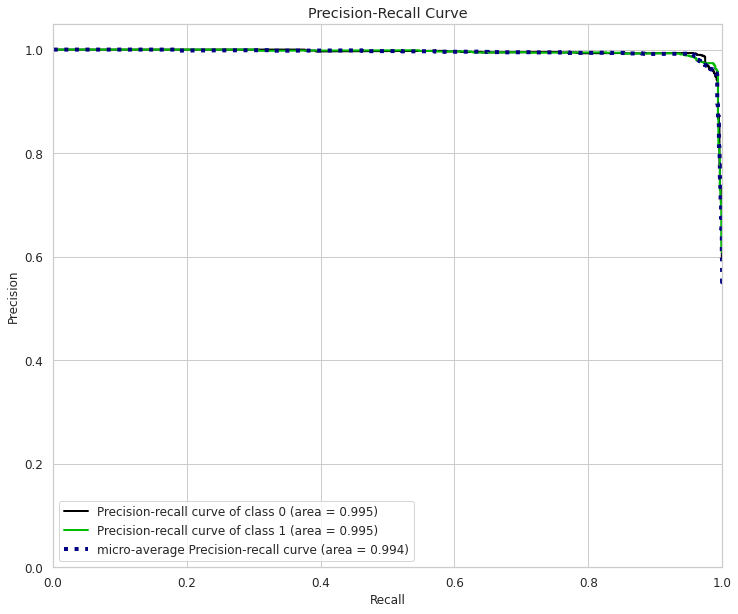

In [49]:
skplt.metrics.plot_precision_recall(y_test, predicted_opt_proba, figsize=(12,10))

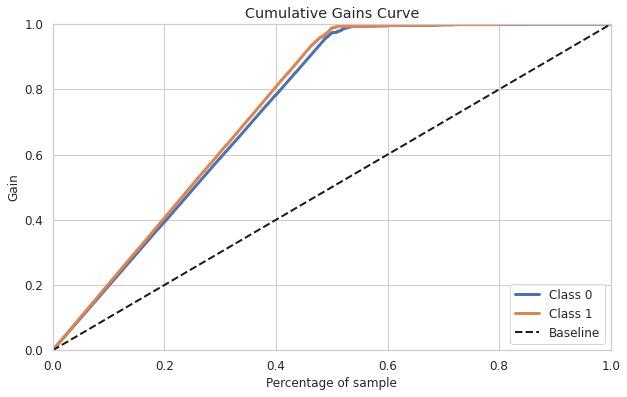

In [50]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_opt_proba, figsize=(10,6))

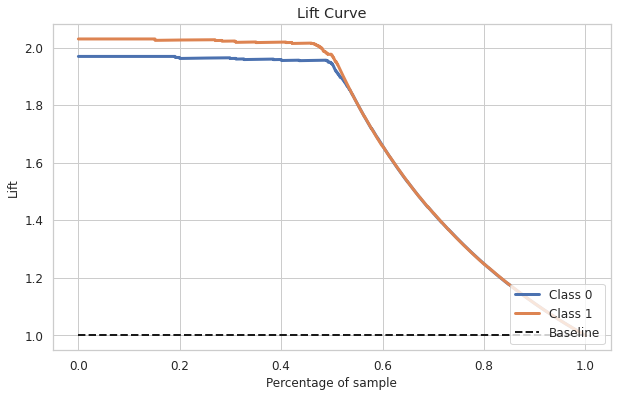

In [51]:
skplt.metrics.plot_lift_curve(y_test, predicted_opt_proba, figsize=(10,6))

In [52]:
!jupyter nbconvert --execute --to html Group21_Project.ipynb

[NbConvertApp] WARNING | pattern 'Group21_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute